In [1]:
from mplfooty.pitch import Pitch
import matplotlib.patheffects as path_effects
import numpy as np

%load_ext autoreload
%autoreload 2

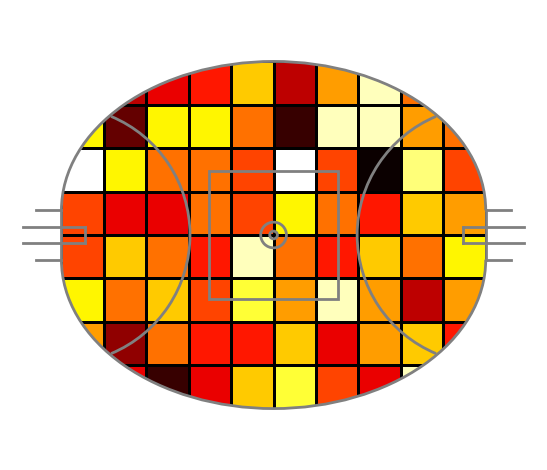

In [2]:
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2, line_colour="grey", pitch_colour='black')
fig, ax = pitch.draw()
x = np.random.uniform(low=-165/2, high=165/2, size=1000)
y= np.random.uniform(low=-135/2, high=135/2, size=1000)
stats = pitch.bin_statistic(x, y, bins=(10, 8))
pitch.heatmap(stats, edgecolors="black", cmap="hot", ax=ax)

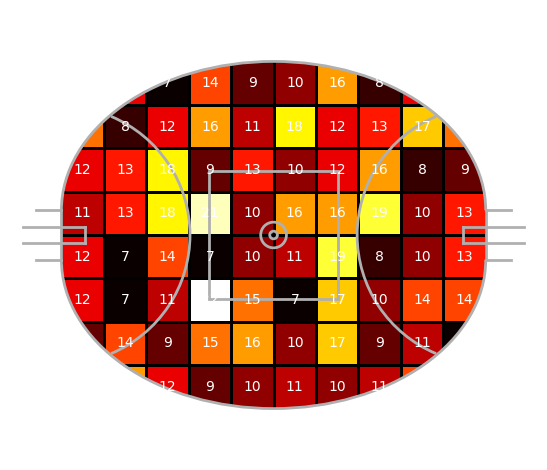

In [3]:
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2, pitch_colour='black')
fig, ax = pitch.draw()
x = np.random.uniform(low=-165/2, high=165/2, size=1000)
y= np.random.uniform(low=-135/2, high=135/2, size=1000)
stats = pitch.bin_statistic(x, y, bins = (10, 8))
pitch.heatmap(stats, edgecolors="black", cmap="hot", ax=ax)
stats['statistic'] = stats['statistic'].astype(int)
path_eff = [path_effects.Stroke(linewidth=0.5, foreground='#22312b')]
text = pitch.label_heatmap(stats, color='white', ax=ax, fontsize=10, ha='center', va='center')

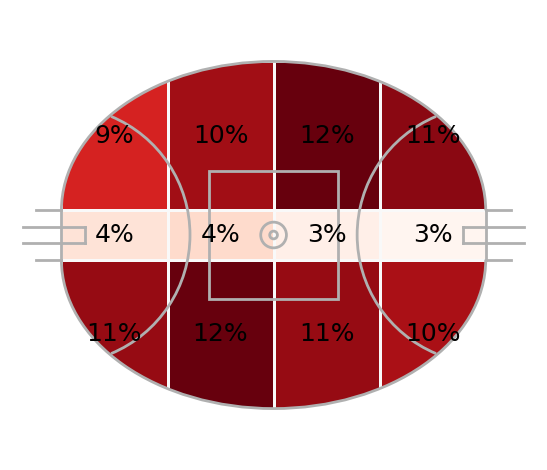

In [4]:
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2, pitch_colour='black')
fig, ax = pitch.draw()
x = np.random.uniform(low=-165/2, high=165/2, size=1000)
y= np.random.uniform(low=-135/2, high=135/2, size=1000)

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=5)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.behind_bottom, pitch.dim.behind_top, pitch.dim.top]))

bin_statistic = pitch.bin_statistic(x, y, statistic="count", bins = (bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, edgecolors="#f9f9f9", cmap="Reds", ax=ax)
labels = pitch.label_heatmap(bin_statistic, color="black", fontsize=18, ax=ax, ha="center", va="center", str_format='{:.0%}')